In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.model_selection  import train_test_split
import graphviz
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
iris = load_iris()

In [ ]:
X_training,X_test,Y_training,Y_test = train_test_split(iris.data,iris.target)

In [ ]:
tree = DecisionTreeClassifier()

In [ ]:
tree.fit(X_training, Y_training)

In [ ]:
tree.score(X_test, Y_test)

In [ ]:
tree.score(X_training,Y_training)

In [ ]:
export_graphviz(tree,out_file='tree.dot',class_names=iris.target_names,feature_names=iris.feature_names, impurity=False, filled=True)

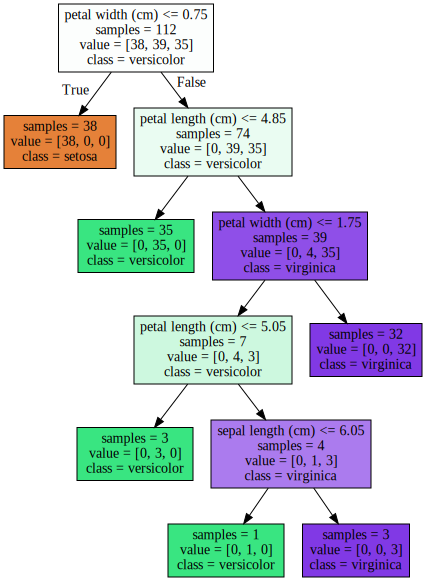

In [101]:
with open('tree.dot')as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

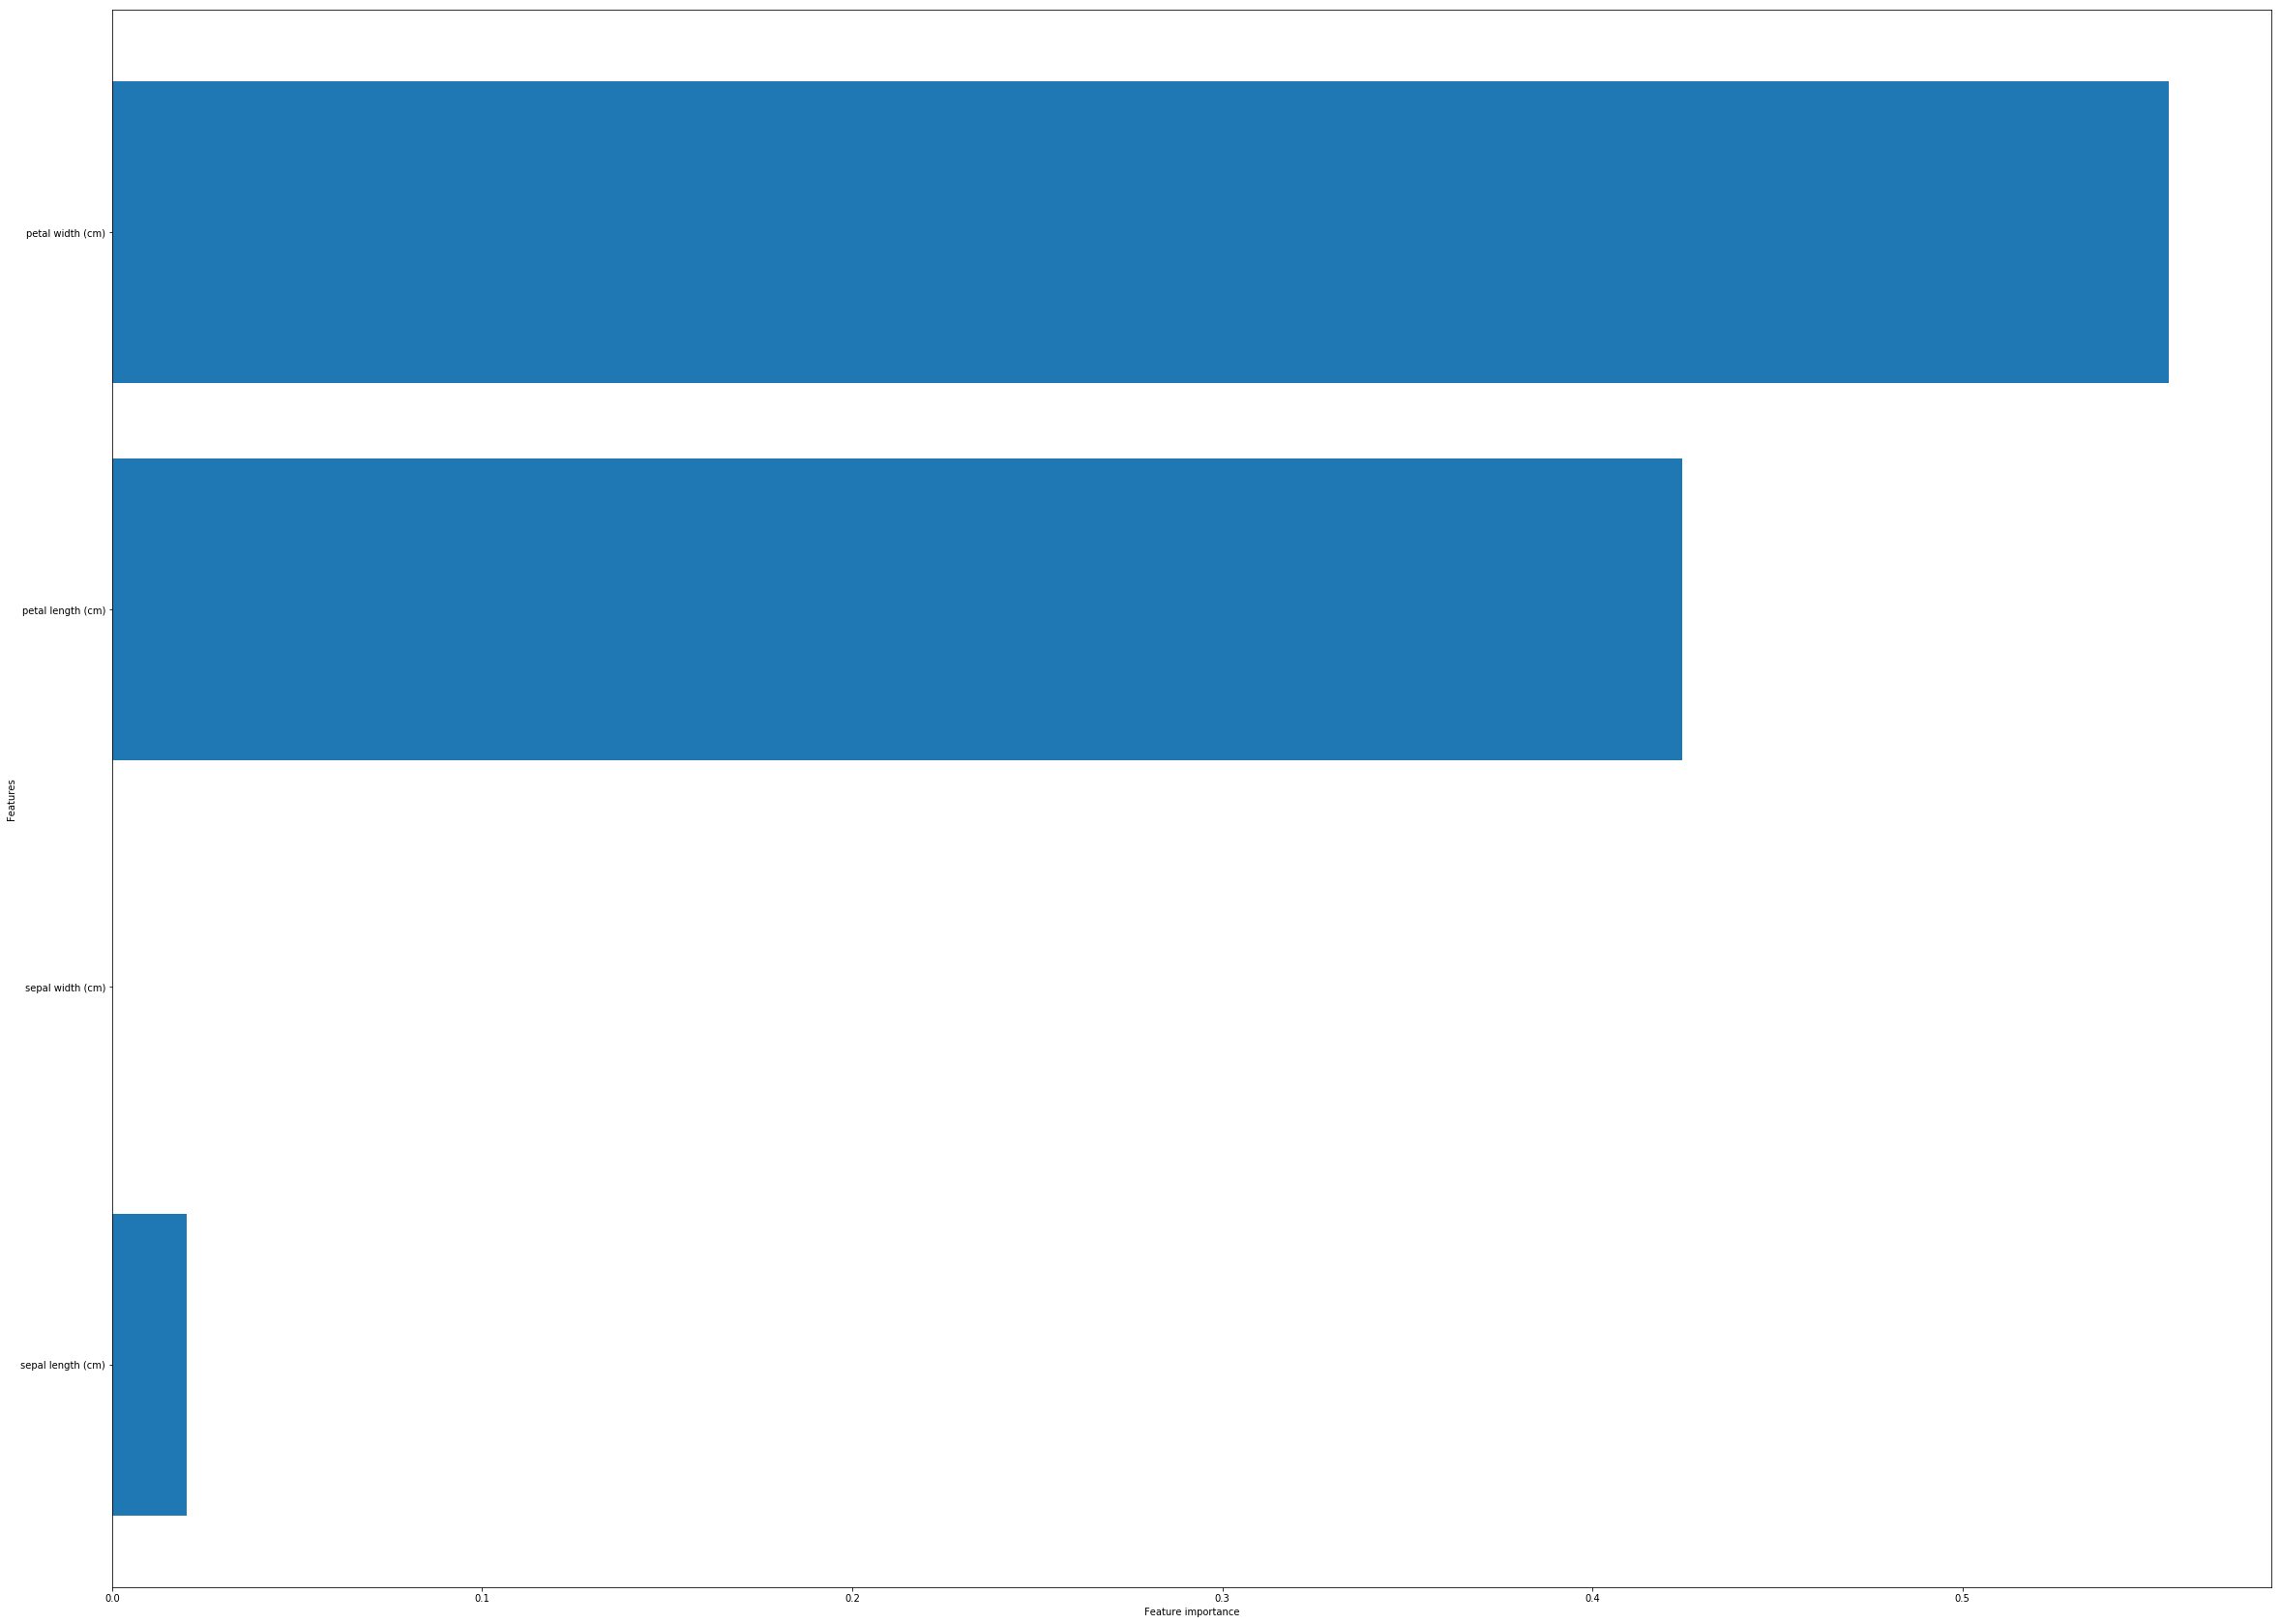

In [102]:
feat = iris.data.shape[1]
#plt.figure(figsize=(15, 10))
plt.barh(range(feat),tree.feature_importances_)
plt.yticks(np.arange(feat),iris.feature_names)
plt.xlabel('Feature importance')
plt.ylabel('Features')
plt.show()

In [78]:
tree = DecisionTreeClassifier(max_depth=3)

In [79]:
tree.fit(X_training, Y_training)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [80]:
tree.score(X_test, Y_test)

0.9210526315789473

In [81]:
tree.score(X_training, Y_training)

0.9910714285714286

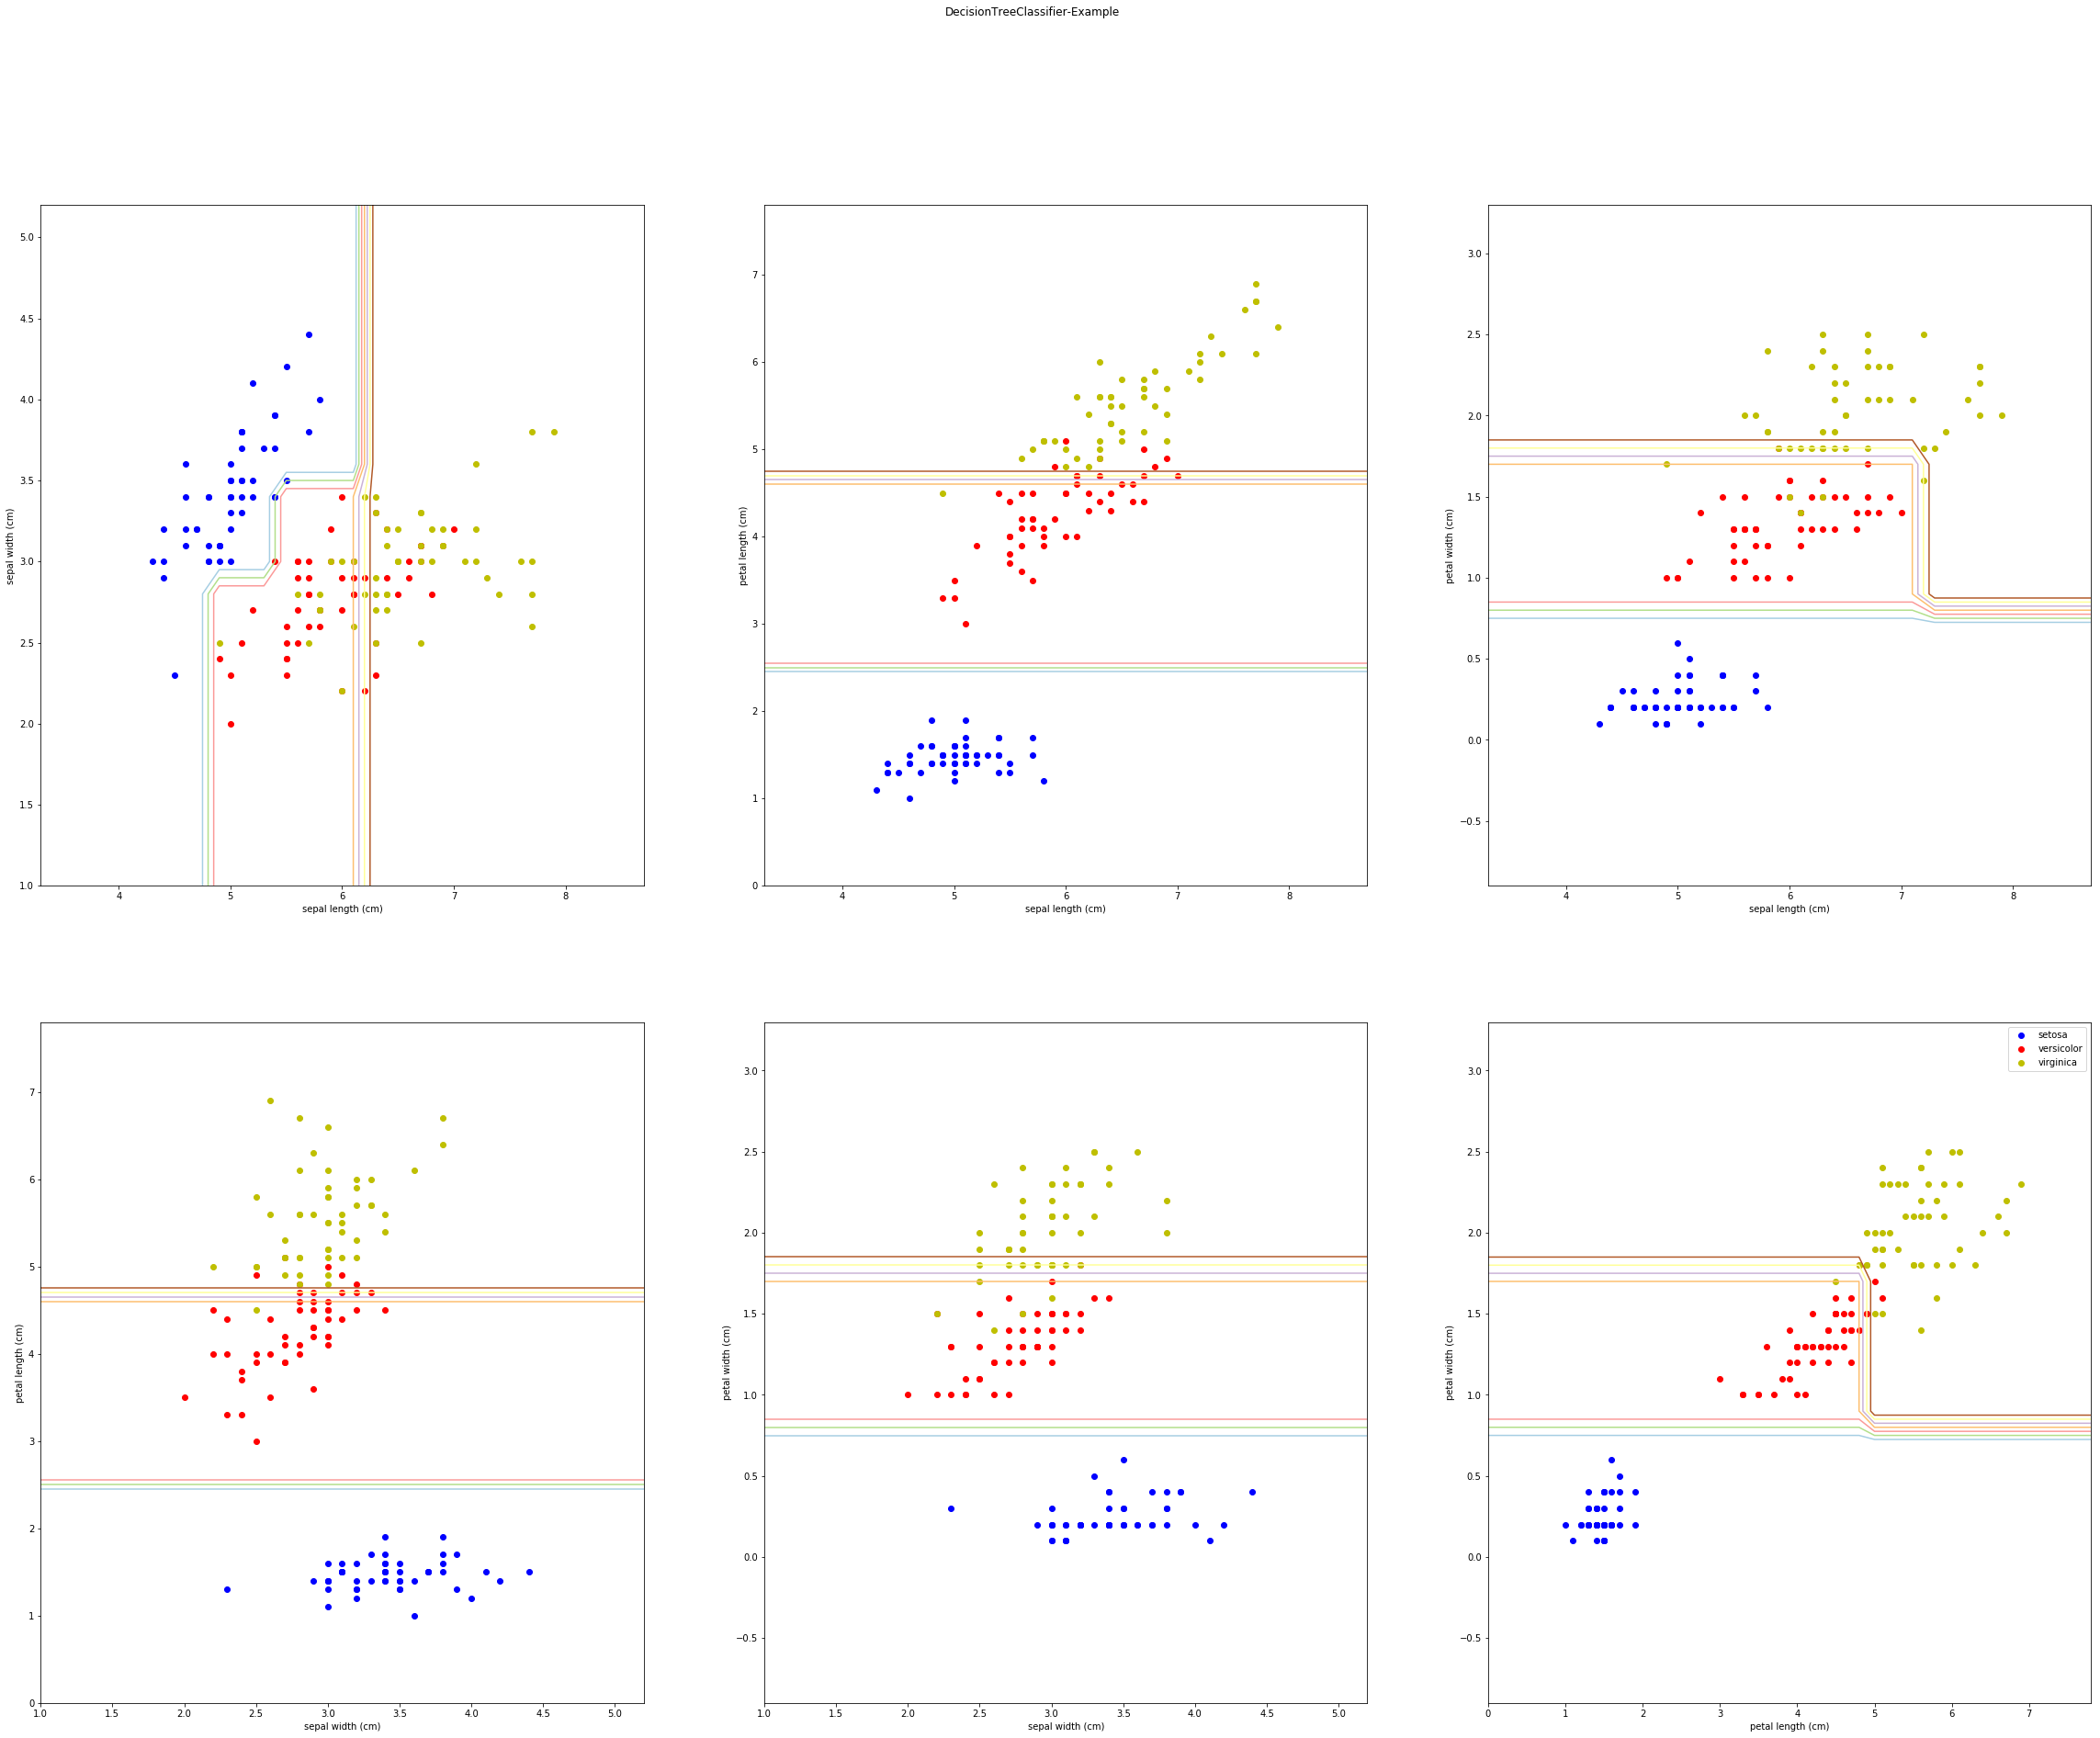

In [92]:
n_classes = 3
plot_colors = 'bry'
plot_step = 0.2




for pairidx, pair in enumerate([[0,1],[0,2],[0,3],
                             [1,2],[1,3],[2,3]]):
    X = iris.data[:,pair]
    Y = iris.target
    
    #training algorithm
    clf = DecisionTreeClassifier(max_depth=3).fit(X,Y)
    #max_depth=3
    plt.subplot(2,3,pairidx + 1)
    
    x_min, x_max = X[:,0].min()-1,X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1,X[:,1].max()+1
    xx,yy = np.meshgrid(np.arange(x_min,x_max,plot_step),
                        np.arange(y_min,y_max,plot_step))
    
    Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z=Z.reshape(xx.shape)
    cs=plt.contour(xx,yy,Z, cmap=plt.cm.Paired)
    
    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis('tight')
    
    for i, color in zip(range(n_classes),plot_colors):
        idx = np.where(Y == i)
        plt.scatter(X[idx,0],X[idx,1],c=color, label=iris.target_names[i],
                   cmap=plt.cm.Paired)
    plt.axis('tight')
        
plt.suptitle('DecisionTreeClassifier-Example')
plt.legend()
plt.show()
    